## Exercise 1: Gate-based Programming with Cirq

In [1]:
import cirq

q0 = cirq.GridQubit(0, 0)
q1 = cirq.GridQubit(0, 1)

m0 = cirq.X(q0)
m1 = cirq.CNOT(q0, q1)
m2 = cirq.measure(q0, q1)

cir = cirq.Circuit([m0, m1, m2])

print(cir)

(0, 0): ───X───@───M───
               │   │
(0, 1): ───────X───M───


In [2]:
sim = cirq.Simulator()
print(sim.simulate(cir))

measurements: q(0, 0),q(0, 1)=11

qubits: (cirq.GridQubit(0, 0),)
output vector: |1⟩

qubits: (cirq.GridQubit(0, 1),)
output vector: |1⟩

phase:
output vector: |⟩


In [3]:
results = sim.run(cir, repetitions=10)
print(results)

q(0, 0),q(0, 1)=1111111111, 1111111111


## 1-Qubit Operation
### |0> is applied X then Z gate

In [4]:
# Show that |0> is applied X then Z

# create qubit (1-dimentional)
qubits = cirq.LineQubit.range(1)
q0 = qubits[0]

# apply X and Z
mX = cirq.X(q0) # rotate 180 degree around x-axis : q0 = |1>
mZ = cirq.Z(q0) # rotate 180 degree around z-axis : q0 = |1>
mMeasure = cirq.measure(q0)

# create circuit
cir = cirq.Circuit([mX, mZ, mMeasure])
print(cir)

# run the circuit
sim = cirq.Simulator()
results = sim.run(cir, repetitions=10)
print(results)

0: ───X───Z───M───
q(0)=1111111111


## 2-Qubit Operation
### |00> apply XX results in |11>

In [5]:
# Show that |00> apply XX results in |11>

qubits = cirq.LineQubit.range(2)
mX0 = cirq.X(qubits[0]) # rotate 180 degree around x-axis : q0 = |1>
mX1 = cirq.X(qubits[1]) # rotate 180 degree around x-axis : q1 = |1>
mMeasure = cirq.measure(*qubits)

cir = cirq.Circuit([mX0, mX1, mMeasure])
print(cir)

sim = cirq.Simulator()
results = sim.run(cir, repetitions=10)
print(results)

0: ───X───M───
          │
1: ───X───M───
q(0),q(1)=1111111111, 1111111111


### What’s happen if we want to apply gate X only one qubit in two-qubit system

In [6]:
# Apply X gate to only the first qubit
qubits = cirq.LineQubit.range(2)
mX0 = cirq.X(qubits[0]) # rotate 180 degree around x-axis : q0 = |1>
mMeasure = cirq.measure(*qubits)

cir = cirq.Circuit([mX0, mMeasure])
print(cir)

sim = cirq.Simulator()
results = sim.run(cir, repetitions=10)
print(results)

0: ───X───M───
          │
1: ───────M───
q(0),q(1)=1111111111, 0000000000


In [7]:
# Apply X gate to only the second qubit
qubits = cirq.LineQubit.range(2)
mX1 = cirq.X(qubits[1]) # rotate 180 degree around x-axis : q1 = |1>
mMeasure = cirq.measure(*qubits)

cir = cirq.Circuit([mX1, mMeasure])
print(cir)

sim = cirq.Simulator()
results = sim.run(cir, repetitions=10)
print(results)

0: ───────M───
          │
1: ───X───M───
q(0),q(1)=0000000000, 1111111111


### 2-Qubit with CNOT (LSB)

In [8]:
# |00> is applied gate CNOT, the result is |00>
qubits = cirq.LineQubit.range(2)

# qubit 0 is control qubit, qubit 1 is target qubit
# cause qubit 0 is |0>, qubit 1 not change
mCNOT = cirq.CNOT(qubits[0], qubits[1])
mMeasure = cirq.measure(*qubits)

cir = cirq.Circuit([mCNOT, mMeasure])
print(cir)

sim = cirq.Simulator()
results = sim.run(cir, repetitions=10)
print(results)

0: ───@───M───
      │   │
1: ───X───M───
q(0),q(1)=0000000000, 0000000000


In [9]:
# |01> is applied gate CNOT, the result is |11>
qubits = cirq.LineQubit.range(2)
mX = cirq.X(qubits[0]) # q0 = |1>

# qubit 0 is control qubit, qubit 1 is target qubit
# cause qubit 0 is |1>, qubit 1 is flipped
mCNOT = cirq.CNOT(qubits[0], qubits[1])
mMeasure = cirq.measure(*qubits)

cir = cirq.Circuit([mX, mCNOT, mMeasure])
print(cir)

sim = cirq.Simulator()
results = sim.run(cir, repetitions=10)
print(results)

0: ───X───@───M───
          │   │
1: ───────X───M───
q(0),q(1)=1111111111, 1111111111


## Exercise 2: Practice of Cirq Programming
### Build a 3 qubits of Quantum circuit that target qubit of CCNOT can be only 1 with 16 trials

In [10]:
# create 3 qubits that use ccnot and always results in |11>
qubits = cirq.LineQubit.range(3)

# qubit 0 and 1 are control qubit, qubit 2 is target qubit
# cause qubit 0 and 1 are |1>, qubit 2 is flipped to |1>
mX0 = cirq.X(qubits[0]) # q0 = |1>
mX1 = cirq.X(qubits[1]) # q1 = |1>
mCCNOT = cirq.CCX(qubits[0], qubits[1], qubits[2])
mMeasure = cirq.measure(*qubits)

cir = cirq.Circuit([mX0, mX1, mCCNOT, mMeasure])
print(cir)

sim = cirq.Simulator()
results = sim.run(cir, repetitions=16)
print(results)

0: ───X───@───M───
          │   │
1: ───X───@───M───
          │   │
2: ───────X───M───
q(0),q(1),q(2)=1111111111111111, 1111111111111111, 1111111111111111


## Quantum Adder Circuit

In [11]:
def q_init(qubit, state):
    if state == 1:
        yield cirq.X(qubit)

In [12]:
def quantum_half_adder(inputA, inputB, sum, carryout):
    # XOR gate => CNOT gate
    # return sum
    yield cirq.CNOT(inputA, sum)
    yield cirq.CNOT(inputB, sum)

    # AND gate => CCNOT gate
    # return carryout
    yield cirq.CCX(inputA, inputB, carryout)

# create qubits in 4 events
events = [
    [0, 0], # A = 0, B = 0
    [0, 1], # A = 0, B = 1
    [1, 0], # A = 1, B = 0
    [1, 1]  # A = 1, B = 1
]

sim = cirq.Simulator()
results = []
for event in events:
    qubits = cirq.LineQubit.range(4)
    inputA = qubits[0]
    inputB = qubits[1]
    sum = qubits[2]
    carryout = qubits[3]

    circuit_list = [
        q_init(inputA, event[0]), 
        q_init(inputB, event[1]), 
        quantum_half_adder(*qubits)
    ]
    circuit_list.append(cirq.measure(*qubits))
    cir = cirq.Circuit(circuit_list)
    print(cir)

    result = sim.run(cir)
    results.append(result)

0: ───@───────@───M───
      │       │   │
1: ───┼───@───@───M───
      │   │   │   │
2: ───X───X───┼───M───
              │   │
3: ───────────X───M───
      ┌──┐
0: ─────@────────@───M───
        │        │   │
1: ────X┼────@───@───M───
        │    │   │   │
2: ─────X────X───┼───M───
                 │   │
3: ──────────────X───M───
      └──┘
0: ───X───@───────@───M───
          │       │   │
1: ───────┼───@───@───M───
          │   │   │   │
2: ───────X───X───┼───M───
                  │   │
3: ───────────────X───M───
0: ───X───@───────@───M───
          │       │   │
1: ───X───┼───@───@───M───
          │   │   │   │
2: ───────X───X───┼───M───
                  │   │
3: ───────────────X───M───


In [13]:
import tabulate as tb

# Extract measurement results
truth_table = []
for result in results:
    # Get the measurement values for the qubits
    measurement = result.records['q(0),q(1),q(2),q(3)'][0][0].tolist()
    decimal = measurement[3] * 2 + measurement[2]
    measurement.append(decimal)
    truth_table.append(measurement)

headers = ['A', 'B', 'Sum', 'Carry Out', 'Decimal']

# Display the truth table
print(tb.tabulate(truth_table, headers=headers, tablefmt='grid', numalign='center'))

+-----+-----+-------+-------------+-----------+
|  A  |  B  |  Sum  |  Carry Out  |  Decimal  |
+=====+=====+=======+=============+===========+
|  0  |  0  |   0   |      0      |     0     |
+-----+-----+-------+-------------+-----------+
|  0  |  1  |   1   |      0      |     1     |
+-----+-----+-------+-------------+-----------+
|  1  |  0  |   1   |      0      |     1     |
+-----+-----+-------+-------------+-----------+
|  1  |  1  |   0   |      1      |     2     |
+-----+-----+-------+-------------+-----------+


## Exercise 3: follow the logic circuit bellow the build Quantum circuit for full adder

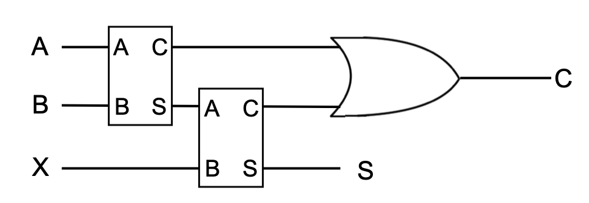

In [14]:
def quantum_full_adder(
        inputA, inputB, carryin, sum, carryout, 
        carryout1, carryout2, sum1
    ):
    yield quantum_half_adder(inputA, inputB, sum1, carryout1)
    yield quantum_half_adder(sum1, carryin, sum, carryout2)

    # OR gate => CNOT gate
    # return carryout
    yield cirq.CNOT(carryout1, carryout)
    yield cirq.CNOT(carryout2, carryout)

# create qubits in 8 events
events = [
    [0, 0, 0], # A = 0, B = 0, Carry In = 0
    [0, 0, 1], # A = 0, B = 0, Carry In = 1
    [0, 1, 0], # A = 0, B = 1, Carry In = 0
    [0, 1, 1], # A = 0, B = 1, Carry In = 1
    [1, 0, 0], # A = 1, B = 0, Carry In = 0
    [1, 0, 1], # A = 1, B = 0, Carry In = 1
    [1, 1, 0], # A = 1, B = 1, Carry In = 0
    [1, 1, 1]  # A = 1, B = 1, Carry In = 1
]

sim = cirq.Simulator()
results = []
for event in events:
    inputA = cirq.NamedQubit('A')
    inputB = cirq.NamedQubit('B')
    carryin = cirq.NamedQubit('Carry In')
    sum = cirq.NamedQubit('Sum')
    carryout = cirq.NamedQubit('Carry Out')
    carryout_1 = cirq.NamedQubit('Carry Out 1')
    carryout_2 = cirq.NamedQubit('Carry Out 2')
    sum_1 = cirq.NamedQubit('Sum 1')

    qubits = [inputA, inputB, carryin, sum, 
              carryout, carryout_1, carryout_2, sum_1]


    circuit_list = [
        q_init(inputA, event[0]), 
        q_init(inputB, event[1]), 
        q_init(carryin, event[2]), 
        quantum_full_adder(*qubits)
    ]
    circuit_list.append(cirq.measure(*qubits))
    cir = cirq.Circuit(circuit_list)
    print(cir)

    result = sim.run(cir)
    results.append(result)

                            ┌──┐
A: ─────────────@───────@──────────────────M───
                │       │                  │
B: ─────────────┼───@───@──────────────────M───
                │   │   │                  │
Carry In: ──────┼───┼───┼────@─────@───────M───
                │   │   │    │     │       │
Carry Out: ─────┼───┼───┼────┼X────┼───X───M───
                │   │   │    ││    │   │   │
Carry Out 1: ───┼───┼───X────┼@────┼───┼───M───
                │   │        │     │   │   │
Carry Out 2: ───┼───┼────────┼─────X───@───M───
                │   │        │     │       │
Sum: ───────────┼───┼───X────X─────┼───────M───
                │   │   │          │       │
Sum 1: ─────────X───X───@──────────@───────M───
                            └──┘
                ┌──┐           ┌──┐
A: ───────────────@────────@──────────────────M───
                  │        │                  │
B: ───────────────┼────@───@──────────────────M───
                  │    │   │                  │
C

In [15]:
# Extract measurement results
truth_table = []
for result in results:
    # Get the measurement values for the qubits
    measurement = result.records[
        'A,B,Carry In,Sum,Carry Out,Carry Out 1,Carry Out 2,Sum 1'
    ][0][0].tolist()
    decimal = measurement[4] * 2 + measurement[3]
    measurement.append(decimal)
    truth_table.append(measurement)

headers = ['A', 'B', 'Carry In', 'Sum', 'Carry Out','c1','c2','s1', 'Decimal']

# Display the truth table
print(tb.tabulate(truth_table, headers=headers, tablefmt='grid', numalign='center'))

+-----+-----+------------+-------+-------------+------+------+------+-----------+
|  A  |  B  |  Carry In  |  Sum  |  Carry Out  |  c1  |  c2  |  s1  |  Decimal  |
+=====+=====+============+=======+=============+======+======+======+===========+
|  0  |  0  |     0      |   0   |      0      |  0   |  0   |  0   |     0     |
+-----+-----+------------+-------+-------------+------+------+------+-----------+
|  0  |  0  |     1      |   1   |      0      |  0   |  0   |  0   |     1     |
+-----+-----+------------+-------+-------------+------+------+------+-----------+
|  0  |  1  |     0      |   1   |      0      |  0   |  0   |  1   |     1     |
+-----+-----+------------+-------+-------------+------+------+------+-----------+
|  0  |  1  |     1      |   0   |      1      |  0   |  1   |  1   |     2     |
+-----+-----+------------+-------+-------------+------+------+------+-----------+
|  1  |  0  |     0      |   1   |      0      |  0   |  0   |  1   |     1     |
+-----+-----+---

|0>: ───Z───M───
|1>: ───X───Z───M───
|+>: ───H───Z───M───
|->: ───H───X───Z───M───


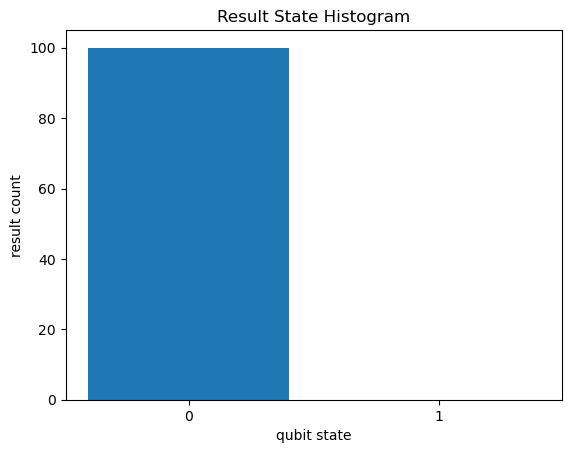

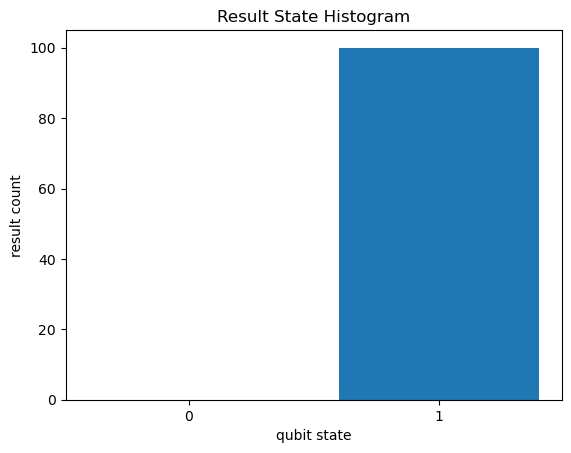

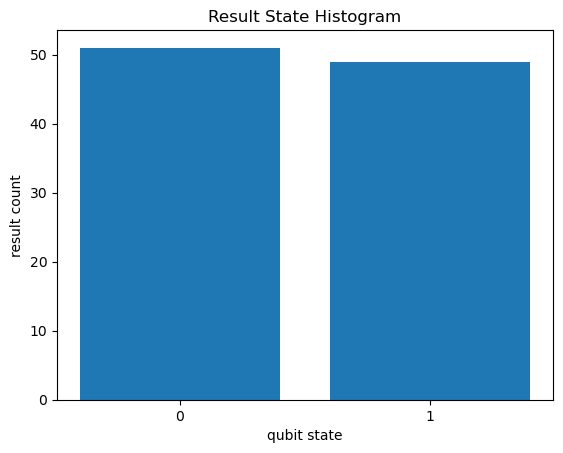

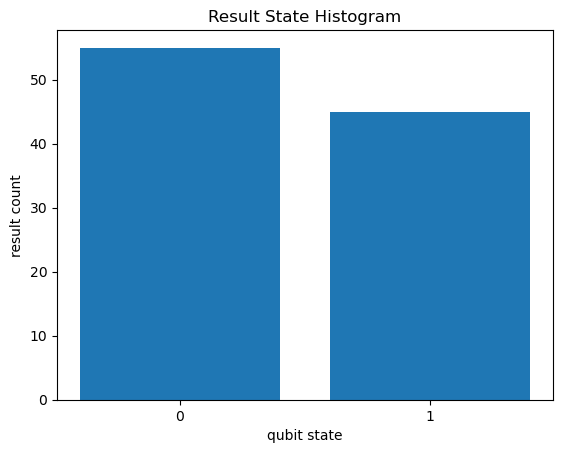

In [17]:
sim = cirq.Simulator()

def sim_circuit(qubit, init=[], sim=sim):
    mMeasure = cirq.measure(qubit)
    circuit = cirq.Circuit([*init, mMeasure])
    print(circuit)

    results = sim.simulate(circuit)

    # plot the histogram
    results = sim.run(circuit, repetitions=100)
    cirq.vis.plot_state_histogram(results)
    

# Z|0> = |0>
qubit = cirq.NamedQubit('|0>')
sim_circuit(qubit, init=[cirq.Z(qubit)])

# Z|1> = -|1>
qubit = cirq.NamedQubit('|1>')
sim_circuit(qubit, init=[cirq.X(qubit), cirq.Z(qubit)])

# Z|+> = |+>
qubit = cirq.NamedQubit('|+>')
sim_circuit(qubit, init=[cirq.H(qubit), cirq.Z(qubit)])

# Z|-> = -|->
qubit = cirq.NamedQubit('|->')
sim_circuit(qubit, init=[cirq.H(qubit), cirq.X(qubit), cirq.Z(qubit)])


## Homework
### Build the circuits in Cirq to generate all possible Bell states

In [77]:
# show data in table
def show_table(results):
    header = ['q[0]', 'q[1]']
    print(tb.tabulate(results.measurements['q(0),q(1)'], headers=header, tablefmt='grid', numalign='center'))

1. $\ket{\Phi^+} = \frac1 {\sqrt{2}}(\ket{00} + \ket{11})$

In [ ]:
# phi+ = |00> + |11>
qubits = cirq.LineQubit.range(2)
mH = cirq.H(qubits[0])                      # make q[0] to |+>
mCNOT = cirq.CNOT(qubits[0], qubits[1])     # make q[1] == q[0]
mMeasure = cirq.measure(*qubits)

cir = cirq.Circuit([mH, mCNOT, mMeasure])
print(cir)

results = sim.run(cir, repetitions=5)
show_table(results)

0: ───H───@───M───
          │   │
1: ───────X───M───
+--------+--------+
|  q[0]  |  q[1]  |
+========+========+
|   0    |   0    |
+--------+--------+
|   1    |   1    |
+--------+--------+
|   1    |   1    |
+--------+--------+
|   1    |   1    |
+--------+--------+
|   1    |   1    |
+--------+--------+


2. $\ket{\Phi^-} = \frac1 {\sqrt{2}}(\ket{00} - \ket{11})$

In [ ]:
# phi- = |00> - |11>
qubits = cirq.LineQubit.range(2)
mH = cirq.H(qubits[0])                      # make q[0] to |+>
mCNOT = cirq.CNOT(qubits[0], qubits[1])     # make q[1] == q[0]
mZ = cirq.Z(qubits[0])                      # flip phase of q[0]
mMeasure = cirq.measure(*qubits)

cir = cirq.Circuit([mH, mCNOT, mZ, mMeasure])
print(cir)

results = sim.run(cir, repetitions=5)

show_table(results)

0: ───H───@───Z───M───
          │       │
1: ───────X───────M───
+--------+--------+
|  q[0]  |  q[1]  |
+========+========+
|   1    |   1    |
+--------+--------+
|   1    |   1    |
+--------+--------+
|   0    |   0    |
+--------+--------+
|   1    |   1    |
+--------+--------+
|   0    |   0    |
+--------+--------+


3. $\ket{\Psi^+} = \frac1 {\sqrt{2}}(\ket{01} + \ket{10})$

In [ ]:
# psi+ = |01> + |10>
qubits = cirq.LineQubit.range(2)
mH = cirq.H(qubits[0])                      # make q[0] to |+>
mCNOT = cirq.CNOT(qubits[0], qubits[1])     # make q[1] == q[0]
mX = cirq.X(qubits[1])                      # flip q[1] on X-axis
mMeasure = cirq.measure(*qubits)

cir = cirq.Circuit([mH, mCNOT, mX, mMeasure])
print(cir)

results = sim.run(cir, repetitions=5)
show_table(results)


0: ───H───@───────M───
          │       │
1: ───────X───X───M───
+--------+--------+
|  q[0]  |  q[1]  |
+========+========+
|   1    |   0    |
+--------+--------+
|   0    |   1    |
+--------+--------+
|   0    |   1    |
+--------+--------+
|   0    |   1    |
+--------+--------+
|   0    |   1    |
+--------+--------+


4. $\ket{\Psi^-} = \frac1 {\sqrt{2}}(\ket{01} - \ket{10})$

In [ ]:
# psi- = |01> - |10>
qubits = cirq.LineQubit.range(2)
mH = cirq.H(qubits[0])                      # make q[0] to |+>
mCNOT = cirq.CNOT(qubits[0], qubits[1])     # make q[1] == q[0]
mX = cirq.X(qubits[1])                      # flip q[1] on X-axis
mZ = cirq.Z(qubits[1])                      # flip phase of q[1]
mMeasure = cirq.measure(*qubits)

cir = cirq.Circuit([mH, mCNOT, mX, mZ, mMeasure])
print(cir)

results = sim.run(cir, repetitions=5)
show_table(results)

0: ───H───@───────────M───
          │           │
1: ───────X───X───Z───M───
+--------+--------+
|  q[0]  |  q[1]  |
+========+========+
|   1    |   0    |
+--------+--------+
|   0    |   1    |
+--------+--------+
|   1    |   0    |
+--------+--------+
|   1    |   0    |
+--------+--------+
|   0    |   1    |
+--------+--------+
